# Histograms
## This notebook outlines the techniques used in Histograms of images

In [1]:
# import the necessary packages
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2

### Histogram
A histogram represents the **distribution of pixel intensities** (whether color or gray- scale) in an image

It can be visualized as a graph (or plot) that gives a high-level intuition of the intensity (pixel value) distribution

- RGB color space --> these pixel values will be in the range of 0 to 255
- Grayscale space --> these pixel values will be in the range of 0 to 255


When plotting the histogram, the X-axis serves as our **“bins”**

- If we construct a histogram with 256 bins, then we are effectively counting the number of times each pixel value occurs
- If we use only 2 (equally spaced) bins, then we are counting the number of times a pixel is in the range **[0, 128)** or **[128, 255]**

The number of pixels binned to the x-axis value is then plotted on the y-axis

By simply examining the histogram of an image, you get a general understanding regarding the following:
- contrast
- brightness
- intensity distribution

### cv2.calcHist( )

### cv2.calcHist(images,channels,mask,histSize,ranges)

- **images**: This is the image that we want to compute a histogram for
    - Wrap it as a list: [myImage]
- **channels**: This is a list of indexes, where we specify the index of the channel we want to compute a histogram for 
    - Grayscale image, the list would be [0]. 
    - RGB image,, the channels list would be [0,1,2]
- **mask**: 
    - If a mask is provided, a histogram will be computed for masked pixels only
    - If we do not have a mask, we can just provide a value of None
- **histSize**: This is the number of bins we want to use when computing a histogram Again, this is a list, one for each channel we are computing a histogram for. The bin sizes do not all have to be the same. Here is an example of 32 bins for each channel: [32,32,32]
- **ranges**: range of possible pixel values. 
    - [0, 256] for each channel

## Grayscale histogram
- Load the image
- Convert the RGB image into grayscale
- Calculate histogram
- Plot the histogram

#### Load the image

In [34]:
image = cv2.imread("image.jpg")
cv2.imshow("Original", image)
cv2.waitKey(0)

13

#### Convert the RGB image into grayscale

In [35]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("GrayScale", image)
cv2.waitKey(0)

13

### Construct a grayscale histogram
cv2.calcHist(images,channels,mask,histSize,ranges)

In [36]:
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

#### Plot the histogram

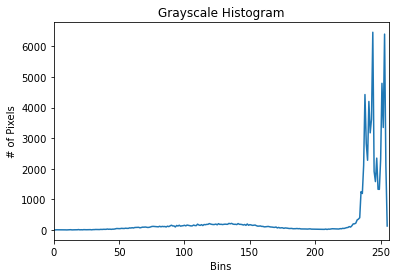

In [37]:
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

## Color Histogram
- Load the image
- Split the channels

#### Load the image

In [41]:
image = cv2.imread("image.jpg")
cv2.imshow("Original", image)
cv2.waitKey(0)

13

#### Split the channels

Split the image into its three channels: blue, green, and red 

Normally, we read this is red, green, blue (RGB)

However, OpenCV stores the image as a NumPy array in reverse order: BGR

In [42]:
chans = cv2.split(image)
colors = ("b", "g", "r")

### Plot the histogram for each channel

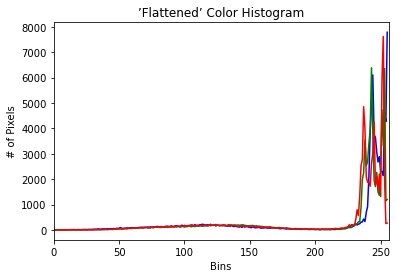

In [43]:
plt.figure()
plt.title("’Flattened’ Color Histogram") 
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

# Loop over the image channels
for (chan, color) in zip(chans, colors):
    # cv2.calcHist(images,channels,mask,histSize,ranges)
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
    plt.xlim([0, 256])

## Multi-dimensional histogram

- How many pixels have a RED value of 10 AND a BLUE value of 20?
- How many pixels have a GREEN value of 200 AND a RED value of 130?

Solution: Multi-dimensional histograms

In [44]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

#### Plot a 2D color histogram for green and blue

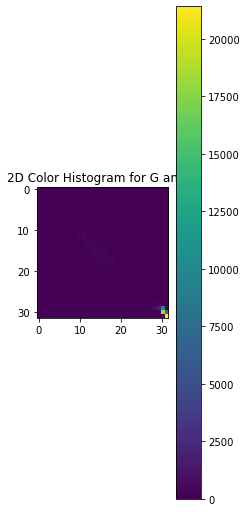

In [47]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(131)
# cv2.calcHist(images,channels,mask,histSize,ranges)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for G and B")
plt.colorbar(p)
plt.show()

#### Plot a 2D color histogram for green and red

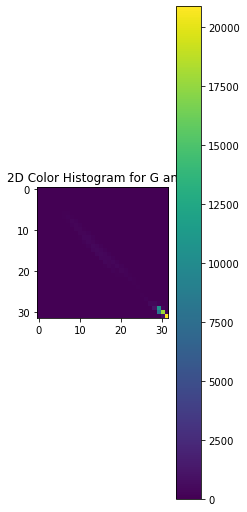

In [49]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)

#### Plot a 2D color histogram for blue and red

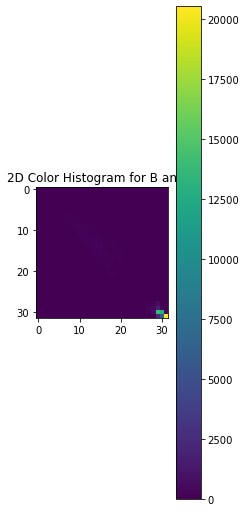

In [50]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)

In [51]:
# Finally, let's examine the dimensionality of one of the 2D histograms
print("2D histogram shape: {}, with {} values".format(hist.shape, hist.flatten().shape[0]))

2D histogram shape: (32, 32), with 1024 values


Our 2D histogram could only take into account 2 out of the 3 channels in the image so now let's build a 3D color histogram (utilizing all channels) with 8 bins in each direction -- we can't plot the 3D histogram, but the theory is exactly like that of a 2D histogram, so we'll just show the shape of the histogram

In [52]:
hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("3D histogram shape: {}, with {} values".format(hist.shape, hist.flatten().shape[0]))

3D histogram shape: (8, 8, 8), with 512 values


In [26]:
plt.show()

2D histogram shape: (32, 32), with 1024 values
3D histogram shape: (8, 8, 8), with 512 values


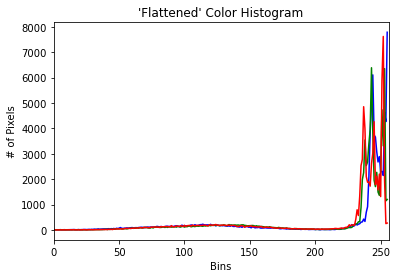

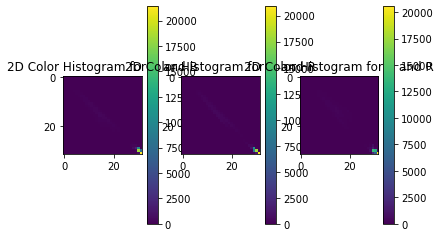

In [27]:
# Grab the image channels, initialize the tuple of colors
# and the figure
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

# Loop over the image channels
for (chan, color) in zip(chans, colors):
	# Create a histogram for the current channel and plot it
	hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
	plt.plot(hist, color = color)
	plt.xlim([0, 256])

# Let's move on to 2D histograms -- I am reducing the
# number of bins in the histogram from 256 to 32 so we
# can better visualize the results
fig = plt.figure()

# Plot a 2D color histogram for green and blue
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None,
	[32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for G and B")
plt.colorbar(p)

# Plot a 2D color histogram for green and red
ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None,
	[32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)

# Plot a 2D color histogram for blue and red
ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None,
	[32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)

# Finally, let's examine the dimensionality of one of
# the 2D histograms
print("2D histogram shape: {}, with {} values".format(
	hist.shape, hist.flatten().shape[0]))

# Our 2D histogram could only take into account 2 out
# of the 3 channels in the image so now let's build a
# 3D color histogram (utilizing all channels) with 8 bins
# in each direction -- we can't plot the 3D histogram, but
# the theory is exactly like that of a 2D histogram, so
# we'll just show the shape of the histogram
hist = cv2.calcHist([image], [0, 1, 2],
	None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("3D histogram shape: {}, with {} values".format(
	hist.shape, hist.flatten().shape[0]))

# Show our plots
plt.show()

## 3d Histogram

3D histogram shape: (4, 4, 4), with 64 values


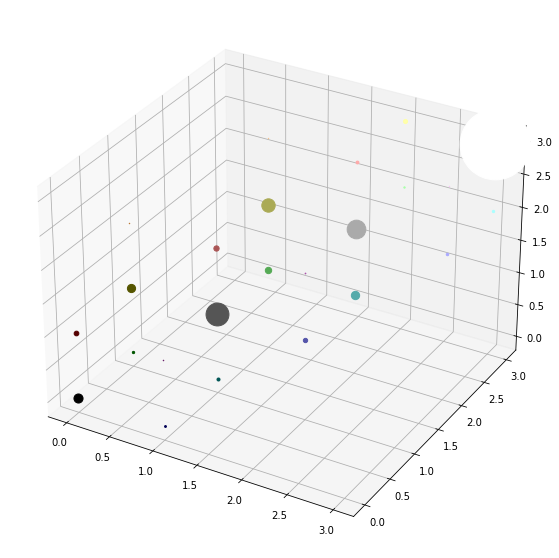

In [55]:
# store our largest bin size and number of bins in convenience
# variables for ease of use
image = cv2.imread("image.jpg")
size = float(5000)
bins = int(4)

# compute the color histogram for the input image
hist = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])

# show the shape of the hostgram
print("3D histogram shape: %s, with %d values" % (hist.shape, hist.flatten().shape[0]))

# initialize our figure
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="3d")

# find the largest value in our histogram and then compute the ratio of our largest size bin to the largest in the histogram
ratio = size / np.max(hist)

# loop over the histogram planes
for (x, plane) in enumerate(hist):
    for (y, row) in enumerate(plane):
        for (z, col) in enumerate(row):
            # ensure that there is a value in the current bin
            if hist[x][y][z] > 0.0:
                # plot the bin
                siz = ratio * hist[x][y][z]
                rgb = (z / (bins - 1), y / (bins - 1), x / (bins - 1))
                ax.scatter(x, y, z, s = siz, facecolors = rgb)

# show the figures 
plt.show()

In [7]:
# store our largest bin size and number of bins in convenience variables for ease of use
image = cv2.imread("image.jpg")
size = float(5000)
bins = int(4)

In [6]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [8]:
# compute the color histogram for the input image
hist = cv2.calcHist([image], [0, 1, 2],None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])

In [9]:
# show the shape of the hostgram
print("3D histogram shape: %s, with %d values" % (hist.shape, hist.flatten().shape[0]))

3D histogram shape: (4, 4, 4), with 64 values


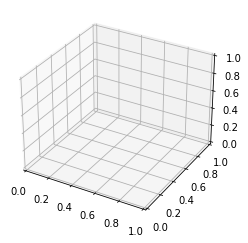

In [10]:
# initialize our figure
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

In [11]:
# find the largest value in our histogram and then compute the ratio
# of our largest size bin to the largest in the histogram
ratio = size / np.max(hist)

In [12]:
# loop over the histogram planes
for (x, plane) in enumerate(hist):
	for (y, row) in enumerate(plane):
		for (z, col) in enumerate(row):
			# ensure that there is a value in the current bin
			if hist[x][y][z] > 0.0:
				# plot the bin
				siz = ratio * hist[x][y][z]
				rgb = (z / (bins - 1), y / (bins - 1), x / (bins - 1))
				ax.scatter(x, y, z, s = siz, facecolors = rgb)


In [13]:
# show the figures 
plt.show()

## Histogram Equalization

Histogram equalization improves the **contrast** of an image by **“stretching”** the distribution of pixels

Consider a histogram with a large peak at the center of it. Applying histogram equalization will stretch the peak out towards the corner of the image, thus improving the global contrast of the image. 

Histogram equalization is applied to **grayscale images**

- Useful when an image contains foregrounds and backgrounds that are both dark or both light
    - It tends to produce unrealistic effects in photographs
    - Normally useful when enhancing the contrast of medical or satellite images
    
### Steps
- Load the image
- Convert RGB into Grayscale
- Equalize the histogram
- Display both the Original and Equalized images

#### Load the image

In [56]:
image = cv2.imread("image.jpg")
# cv2.imshow("Original", image)
# cv2.waitKey(0)

#### Convert the RGB  into Grayscale

In [57]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# cv2.imshow("Gray", image)
# cv2.waitKey(0)

#### Equalize

In [58]:
eq = cv2.equalizeHist(image)

#### Display the imaages

In [59]:
cv2.imshow("Histogram Equalization", np.hstack([image, eq]))
cv2.waitKey(0)

13

## Histograms and Masks
- Construct a mask
- Compute Histograms for the masked region

**plot_histogram(image, title, mask)** - Simply computes a histogram for each channel in the image and plots it

In [60]:
def plot_histogram(image, title, mask = None):
    chans = cv2.split(image)
    colors = ("b", "g", "r")
    
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    
    for (chan, color) in zip(chans, colors):
        hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])
        plt.plot(hist, color = color)
        plt.xlim([0, 256])

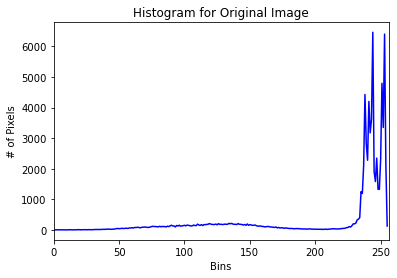

In [64]:
plot_histogram(image, "Histogram for Original Image")

### Construct a mask

In [61]:
mask = np.zeros(image.shape[:2], dtype = "uint8")
cv2.rectangle(mask, (15, 15), (130, 100), 255, -1)
cv2.imshow("Mask", mask)
cv2.waitKey(0)

13

### Apply the mask to the image

In [62]:
masked = cv2.bitwise_and(image, image, mask = mask)
cv2.imshow("Applying the Mask", masked)
cv2.waitKey(0)

13

### Plot the histogram of the masked image

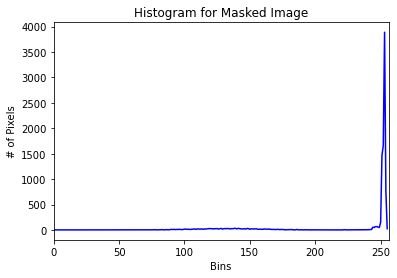

In [63]:
plot_histogram(image, "Histogram for Masked Image", mask = mask)

### Try with different images

In [9]:
import cv2
import numpy as np

In [10]:
image = cv2.imread("potrait.jpg")

In [11]:
image.shape

(425, 640, 3)

In [12]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [13]:
eq = cv2.equalizeHist(image)

In [14]:
cv2.imshow("Histogram Equalization", np.hstack([image, eq]))
cv2.waitKey(0)

27